# Loading images and sources 

## Set up visualization

In [1]:
%matplotlib inline

In [3]:
from thunder import Colorize
image = Colorize.image
import seaborn as sns
sns.set_context("poster")

## Load the image data and generate a mean image

In [4]:
bucket = "s3n://neuro.datasets/"
path = "challenges/neurofinder/01.00/"
images = tsc.loadImages(bucket + path + 'images', npartitions=100)

In [5]:
im = images.mean()

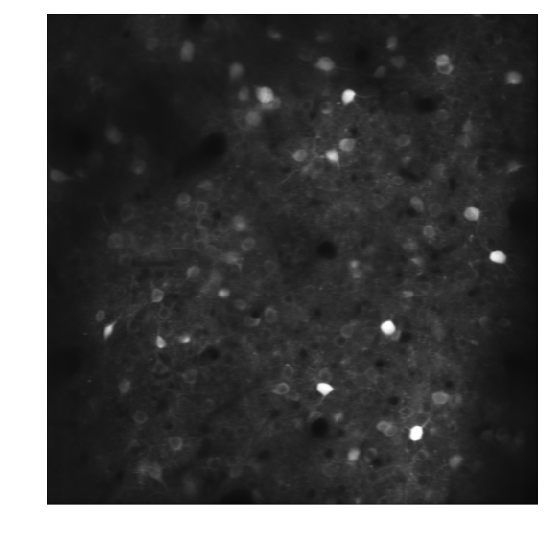

In [6]:
image(im)

## Load the sources and view them

In [9]:
sources = tsc.loadSources(bucket + path + 'sources/sources.json')

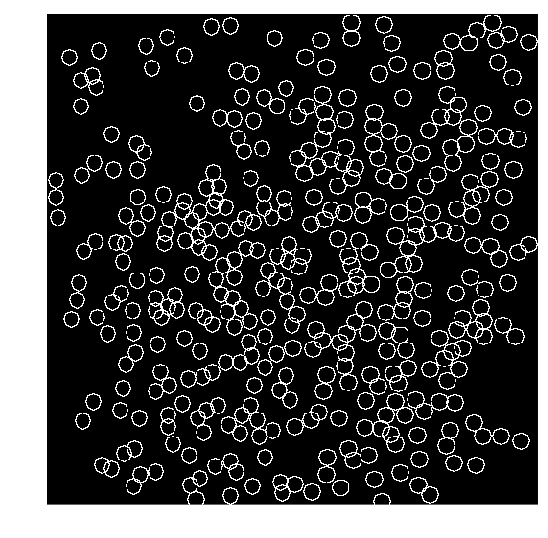

In [11]:
image(sources.masks((512,512), outline=True))

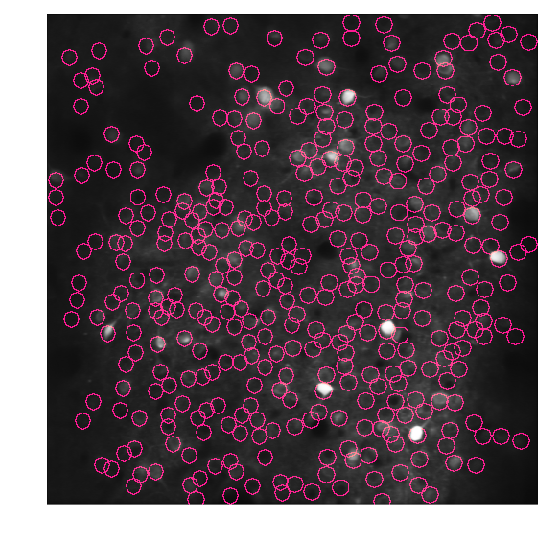

In [12]:
image(sources.masks((512,512), outline=True, base=im))

## Compare with the results of a simple algorithm

In [13]:
from thunder import SourceExtraction

In [22]:
ext = SourceExtraction('localmax', minDistance=5, maxSources=100, radius=8)
model = ext.fit(images)

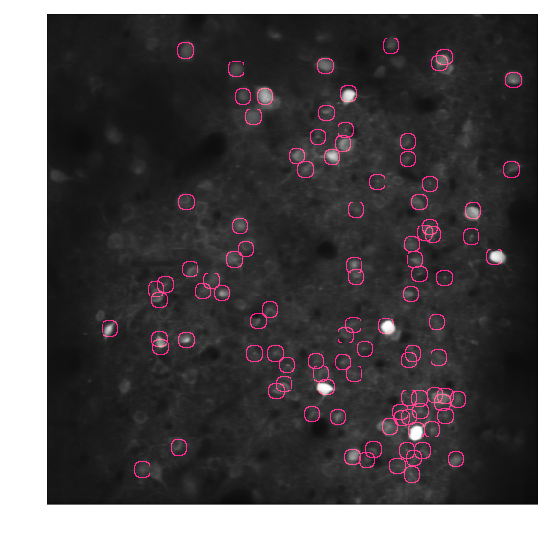

In [23]:
image(model.masks((512,512), base=im, outline=True))

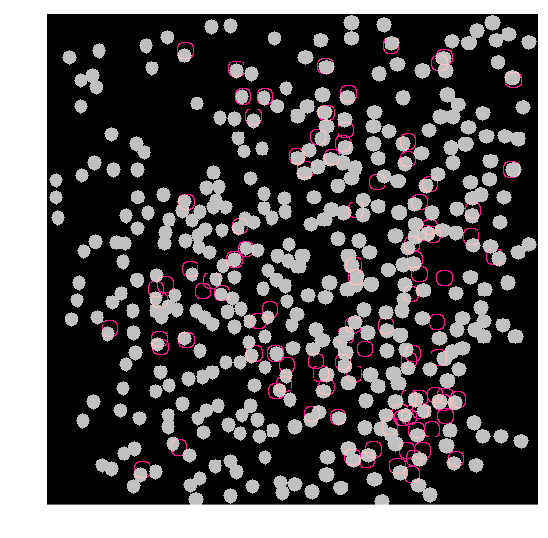

In [24]:
image(model.masks((512,512), base=sources))

In [25]:
sources.similarity(model, thresh=5)

0.10732984293193717

## Look at true sources against local correlation

In [28]:
corr = images.localCorr(3)

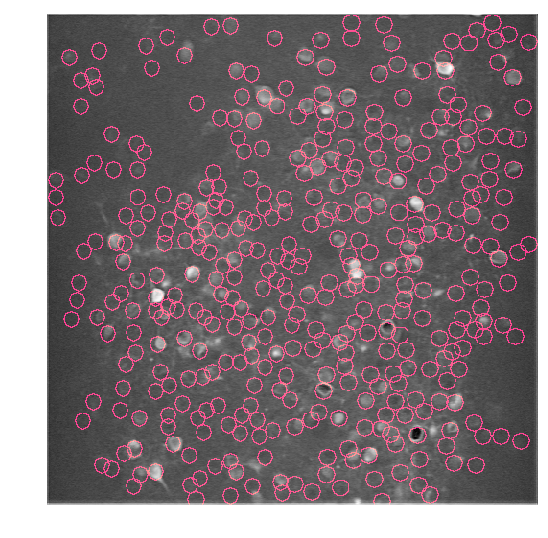

In [31]:
image(sources.masks((512,512), base=corr, outline=True))